# Scoping

**Business Understanding**

Aim of the competition is to build a predictable model that predict sales price. It is a Supervised Machine Learning Problem. 

**About Dataset**

The sales in the mega marts are critical to make them sustainable. As a matter of fact, the rise of several marts have created buyers of different categories which are critical about quality of product at the right price. The datasets was provided by machinehack. which consist of the following attribute
Item_ID: Item Identification Number
Item_W: Item Weight
Item_Type: Item
Item_MRP: MRP of the Product
Outlet_ID: Outlet ID
Outlet_Year: Outlet Establishment year
Outlet_Size: Size of the outlet
Outlet_Type: Type of the outlet
Sales: Total sales from the outlet

Train: 87864 rows x 09 columns

Test: 37656 rows x 09 columns

In [65]:
# importing relevant libraries

# data manipulation
import pandas as pd
import numpy as np
import pickle

# data visualization 
import seaborn as sns
from matplotlib import pyplot as plt

# model development algorithsm
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.ensemble import HistGradientBoostingRegressor, AdaBoostRegressor

# model pipeline
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

# model evaluation and scoring
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

# model interpretion and analysis
from yellowbrick.regressor import PredictionError, ResidualsPlot

**Data Understading**

In [2]:
# loading training datasets into local machine
df = pd.read_csv('train.csv')

In [3]:
# returns the first rows
df.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829


In [4]:
# return a tuple representing the dimensionality of the DataFrame.
df.shape

(87864, 9)

In [5]:
# print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87864 entries, 0 to 87863
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_ID               87864 non-null  object 
 1   Item_W                87864 non-null  float64
 2   Item_Type             87864 non-null  object 
 3   Item_MRP              87864 non-null  float64
 4   Outlet_ID             87864 non-null  object 
 5   Outlet_Year           87864 non-null  int64  
 6   Outlet_Size           87864 non-null  object 
 7   Outlet_Location_Type  87864 non-null  object 
 8   Sales                 87864 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.0+ MB


In [6]:
# return number of missing values present
df.isnull().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
Sales                   0
dtype: int64

In [7]:
# Compute pairwise correlation of columns
df.corr()

,Item_W,Item_MRP,Outlet_Year,Sales
Item_W,1.000000,-0.022830,0.009632,0.000615
Item_MRP,-0.022830,1.000000,-0.009837,0.014813
Outlet_Year,0.009632,-0.009837,1.000000,-0.035701
Sales,0.000615,0.014813,-0.035701,1.000000


In [8]:
# Generate descriptive statistics.
df.describe()

,Item_W,Item_MRP,Outlet_Year,Sales
count,87864.000000,87864.000000,87864.00000,87864.000000
mean,15.591469,151.242943,1999.87063,1911.842120
std,4.364429,59.536366,6.63429,1291.386004
min,7.992700,32.910015,1987.00000,-1229.360345
25%,10.968658,112.423337,1997.00000,959.249675
50%,15.831170,145.581473,1999.00000,1606.307877
75%,19.969936,197.110367,2004.00000,2608.057736
max,21.250000,265.214271,2009.00000,10309.283310


In [9]:
# Create a spreadsheet-style pivot table as a DataFrame.
pd.pivot_table(df, values='Sales', columns='Outlet_Location_Type', aggfunc=np.average, index='Outlet_Size')

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,1999.896972,2110.310673,2034.629508
Medium,1961.691029,1946.506696,1683.133302
Small,1928.521745,1999.453519,1933.686259


**Data Analysis**

1. plotting distribution
2. plotting relationship
3. detecting outliers

<AxesSubplot:title={'center':'Plotting the Distribution of Sales.'}, xlabel='Sales', ylabel='Count'>

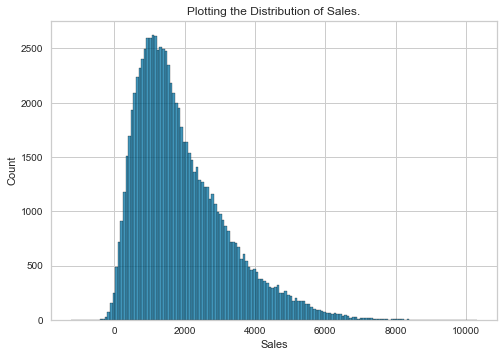

In [10]:
# showing distributions of Sales
plt.title('Plotting the Distribution of Sales.')
sns.histplot(data=df['Sales'])

In [11]:
df['log_item'] = np.log(df['Item_W'])
df['log_item_mrp'] = np.log(df['Item_MRP'])

<AxesSubplot:title={'center':'Plotting the Distribution of Item Weight.'}, xlabel='log_item', ylabel='Count'>

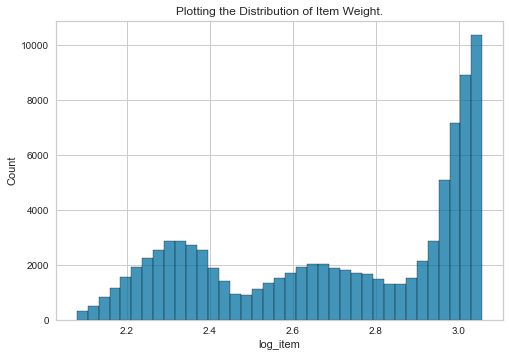

In [12]:
# showing distributions of log Sales 
plt.title('Plotting the Distribution of Item Weight.')
sns.histplot(data=df, x='log_item')

<AxesSubplot:title={'center':'Plotting the Distribution of Item.'}, xlabel='log_item_mrp', ylabel='Count'>

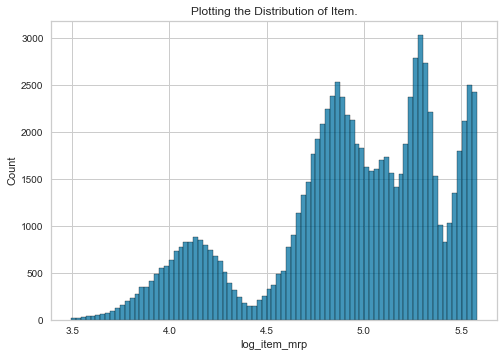

In [13]:
# showing distributions of Sales
plt.title('Plotting the Distribution of Item.')
sns.histplot(data=df, x='log_item_mrp', )

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

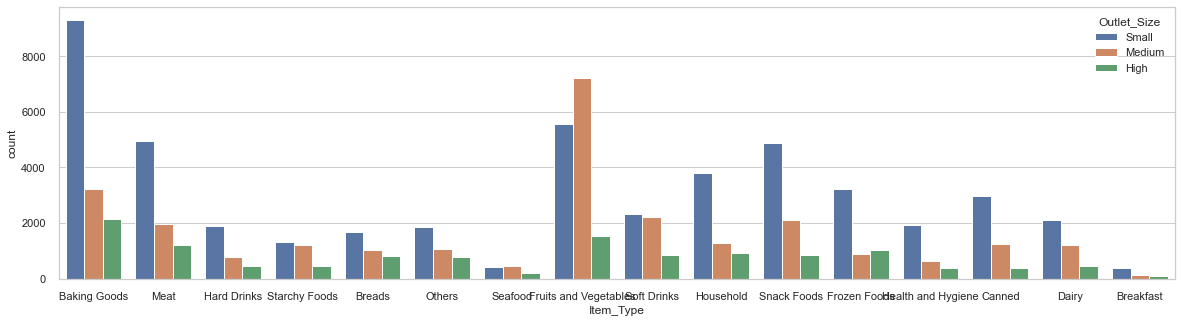

In [14]:
# Show the counts of observations in each categorical bin using bars.
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x='Item_Type', hue='Outlet_Size')

<AxesSubplot:title={'center':'Plotting boxplot of Numeric Sales.'}, xlabel='Sales'>

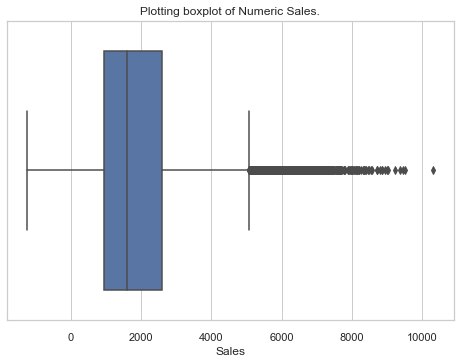

In [15]:
plt.title('Plotting boxplot of Numeric Sales.')
sns.boxplot(data=df, x='Sales')

<AxesSubplot:title={'center':'Plotting the Relationship between Sales and Year.'}, xlabel='Outlet_Year', ylabel='Sales'>

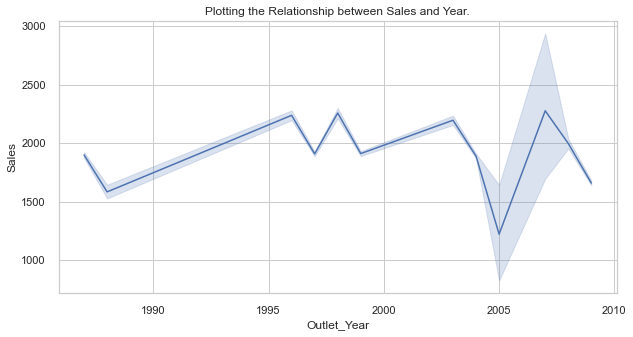

In [16]:
# showing the relationship of sales and year
plt.figure(figsize=(10, 5))
plt.title('Plotting the Relationship between Sales and Year.')
sns.lineplot(data=df, y='Sales', x='Outlet_Year', dashes=False)

<AxesSubplot:title={'center':'Plotting boxplot Nested Categorical.'}, xlabel='Item_Type', ylabel='Sales'>

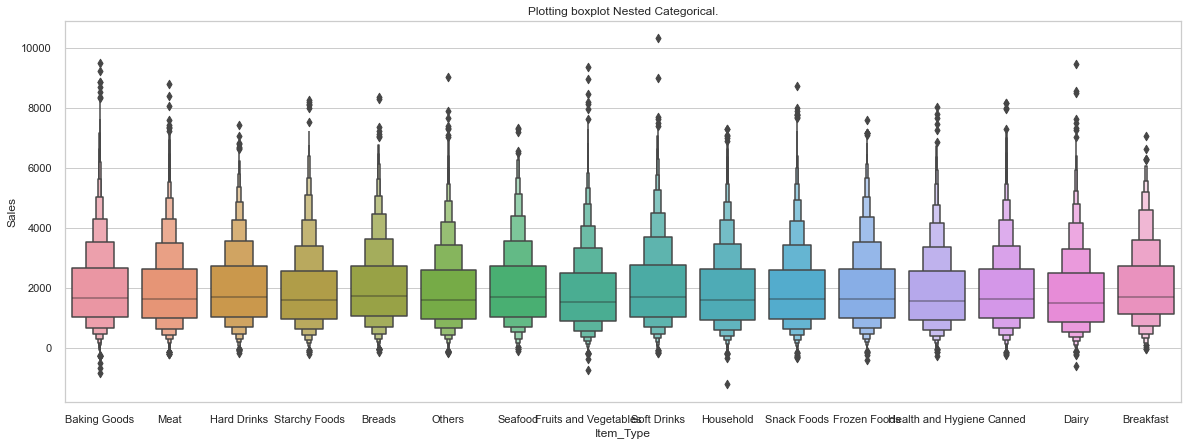

In [17]:
# Detecting outliers
plt.figure(figsize=(20, 7))
plt.title('Plotting boxplot Nested Categorical.')
sns.boxenplot(data=df, x='Item_Type', y='Sales', orient="v")

**Data Clearning**

1. dropping inrelevant columns
2. convert categorical features to numberic
3. treating outliers

In [18]:
# dropping cols not to use during modeling 
new_df = df.drop(['Item_ID','Outlet_ID', 'Item_W', 'Item_MRP', 'Outlet_Year'], axis=1)

In [19]:
# assigning independent variable 
X = new_df.drop(['Sales'], axis=1)
# assigning dependent variable
y = new_df['Sales']

In [20]:
# return a subset of the DataFrame's columns based on the column dtypes.
cat_col = X.select_dtypes(include='object')
# return a subset of the DataFrame's columns based on the column dtypes.
num_col = X.select_dtypes(include=['float64', 'int64'])

In [21]:
# Encode categorical features as an integer array.
new_encode = OrdinalEncoder().fit_transform(cat_col)

encode = pd.DataFrame(new_encode, columns=['Item_Type','Outlet_Size','Outlet_Location_Type'])
# Concatenate pandas objects
concate = pd.concat([num_col, encode], axis=1)
concate.head()

,log_item,log_item_mrp,Item_Type,Outlet_Size,Outlet_Location_Type
0,3.045831,5.284991,0.0,2.0,1.0
1,3.049385,4.998901,10.0,2.0,0.0
2,3.038900,5.325276,7.0,2.0,2.0
3,3.046921,5.535039,15.0,2.0,0.0
4,3.056257,5.484262,0.0,2.0,2.0


In [22]:
# treating outliers using flooring and capping method
#Q1 = concate[:].quantile(0.25)
#Q3 = concate[:].quantile(0.75)
#IQR = Q3-Q1
#whisker_width = 1.5
#lower_whisker = Q1-(whisker_width*IQR)
#upper_whisker = Q3+(whisker_width*IQR)
#concate[:] = np.where(concate[:]>upper_whisker, upper_whisker, np.where(concate[:]<lower_whisker, lower_whisker, concate[:]))

In [23]:
# Constructs a transformer from an arbitrary callable.
#new_concate = FunctionTransformer(np.log, validate=True).transform(concate)

**Model Developement**

1. Scaling data
2. split into train and test data
3. implementing algorithsm 

In [24]:
# Transform features by scaling each feature to a given range.
x = MinMaxScaler().fit_transform(concate)

In [25]:
# Split arrays or matrices into random train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.31, random_state=1)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60626, 5)
(27238, 5)
(60626,)
(27238,)


**Model Implementation**

Building model with pipe for transformation, performing feature selection using recursive feature elimination then passing through final estimator HistGradientBoostingregress for modelling.

In [66]:
# Pipeline of transforms with a final estimator.
pipelne = Pipeline([
    # Principal component analysis
    # 'select', RFE(estimator=LassoCV(cv=4))
    # Apply a power transform featurewise to make data more Gaussian-like.
    ('tran', PCA()),
    # Implementation of the scikit-learn API for CatBoost regression.
    ('hist', HistGradientBoostingRegressor(loss='absolute_error', learning_rate=0.1, scoring='r2', max_depth=10))
])
# Fit the model
pipelne.fit(x_train, y_train)

# Histogram-based Gradient Boosting Regression Tree.
#hist =  HistGradientBoostingRegressor(learning_rate=0.1, max_bins=100, scoring='r2', max_depth=10, tol=1e-12, max_iter=200)

Pipeline(steps=[('tran', PCA()),
                ('hist',
                 HistGradientBoostingRegressor(loss='absolute_error',
                                               max_depth=10, scoring='r2'))])

In [67]:
# Split dataset into k consecutive folds
kfld = KFold(n_splits=8, shuffle=True, random_state=1)

# specifying parameter
pamt = {
    'hist__max_depth' : [9, 12]
}

# Exhaustive search over specified parameter values for an estimator.
hist_search = GridSearchCV(estimator=pipelne, param_grid=pamt, cv=kfld, scoring='r2')
# Run fit with all sets of parameters.
hist_search.fit(x_train, y_train)
#model_hist = TransformedTargetRegressor(regressor=pipelne, transformer=MinMaxScaler())
#model_hist.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=8, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('tran', PCA()),
                                       ('hist',
                                        HistGradientBoostingRegressor(loss='absolute_error',
                                                                      max_depth=10,
                                                                      scoring='r2'))]),
             param_grid={'hist__max_depth': [9, 12]}, scoring='r2')

In [68]:
# Call predict on the estimator with the best found parameters.
ytrue = hist_search.predict(x_test)

**Model Evaluation and Error Performance**

In [69]:
# R^2 (coefficient of determination) regression score function.
print("R2 Score: {:.3f}".format(r2_score(y_test, ytrue)))
# Mean absolute error regression loss
print("Mean Absolute Error: {:.3f}".format(mean_absolute_error(y_test, ytrue)))
# Mean squared error regression loss
print("Mean Square Error: {:.3f}".format(mean_squared_error(y_test, ytrue)))

R2 Score: -0.046
Mean Absolute Error: 974.850
Mean Square Error: 1736328.669
Root Mean Square Error: 1317.698


**Model Interpretation and Analysis**

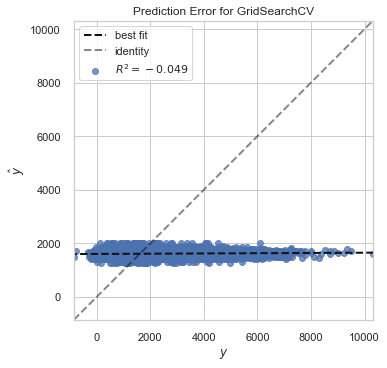

<AxesSubplot:title={'center':'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [50]:
# prediction error visualizer plots the actual targets from the dataset against the predicted values generated by our model
visualizer = PredictionError(hist_search)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

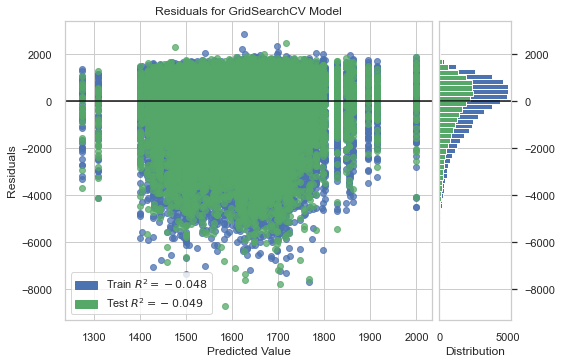

<AxesSubplot:title={'center':'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [51]:
# residual plot shows the residuals on the vertical axis and the independent variable on the horizontal axis.
visualizer = ResidualsPlot(hist_search)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

**Model Implementation**

Building model with pipe for transformation, performing feature selection using recursive feature elimination then passing through final estimator Catboostregress for modelling.

In [52]:
# Pipeline of transforms with a final estimator.
pipe = Pipeline([
    # Principal component analysis
    # 'select', RFE(estimator=LassoCV(cv=4))
    # Apply a power transform featurewise to make data more Gaussian-like.
    ('tran', RFE(LassoCV(cv=3))),
    # Implementation of the scikit-learn API for CatBoost regression.
    ('catboost', CatBoostRegressor(max_bin=255, iterations=100, max_depth=10))
])
# Fit the model
pipe.fit(x_train, y_train)

Learning rate set to 0.466352
0:	learn: 1290.6487785	total: 27.5ms	remaining: 2.72s
1:	learn: 1289.9100058	total: 115ms	remaining: 5.61s
2:	learn: 1289.7607682	total: 166ms	remaining: 5.37s
3:	learn: 1289.5838642	total: 208ms	remaining: 4.99s
4:	learn: 1289.5276303	total: 240ms	remaining: 4.56s
5:	learn: 1289.4198428	total: 266ms	remaining: 4.16s
6:	learn: 1289.3973462	total: 289ms	remaining: 3.84s
7:	learn: 1289.2361173	total: 321ms	remaining: 3.69s
8:	learn: 1289.0748242	total: 415ms	remaining: 4.19s
9:	learn: 1289.0317517	total: 441ms	remaining: 3.97s
10:	learn: 1289.0096890	total: 474ms	remaining: 3.83s
11:	learn: 1289.0096661	total: 492ms	remaining: 3.61s
12:	learn: 1288.9761208	total: 522ms	remaining: 3.49s
13:	learn: 1288.8612813	total: 592ms	remaining: 3.64s
14:	learn: 1288.8426530	total: 626ms	remaining: 3.55s
15:	learn: 1288.8426528	total: 647ms	remaining: 3.4s
16:	learn: 1288.8362738	total: 672ms	remaining: 3.28s
17:	learn: 1288.8254298	total: 695ms	remaining: 3.16s
18:	lear

Pipeline(steps=[('tran', RFE(estimator=LassoCV(cv=3))),
                ('catboost',
                 <catboost.core.CatBoostRegressor object at 0x0000024C0159AC70>)])

In [53]:
# Split dataset into k consecutive folds
kf = KFold(n_splits=6, shuffle=True, random_state=12)

# specifying parameter
para = {
    'catboost__max_depth' : [12, 15]
}

# Exhaustive search over specified parameter values for an estimator.
cat_search = GridSearchCV(estimator=pipe, param_grid=para, cv=kf, scoring='r2')
# Run fit with all sets of parameters.
cat_search.fit(x_train, y_train)

Learning rate set to 0.451459
0:	learn: 1289.3480411	total: 23ms	remaining: 2.28s
1:	learn: 1288.5788823	total: 87.9ms	remaining: 4.31s
2:	learn: 1288.4163831	total: 121ms	remaining: 3.92s
3:	learn: 1288.1747181	total: 191ms	remaining: 4.59s
4:	learn: 1288.0999718	total: 223ms	remaining: 4.23s
5:	learn: 1288.0941241	total: 242ms	remaining: 3.79s
6:	learn: 1288.0330911	total: 264ms	remaining: 3.51s
7:	learn: 1287.9628817	total: 324ms	remaining: 3.72s
8:	learn: 1287.7719424	total: 391ms	remaining: 3.96s
9:	learn: 1287.7296642	total: 414ms	remaining: 3.73s
10:	learn: 1287.7051440	total: 440ms	remaining: 3.56s
11:	learn: 1287.7051151	total: 458ms	remaining: 3.36s
12:	learn: 1287.6132947	total: 504ms	remaining: 3.37s
13:	learn: 1287.6132807	total: 539ms	remaining: 3.31s
14:	learn: 1287.5852068	total: 565ms	remaining: 3.2s
15:	learn: 1287.4711826	total: 612ms	remaining: 3.21s
16:	learn: 1287.2550801	total: 825ms	remaining: 4.03s
17:	learn: 1287.2500284	total: 845ms	remaining: 3.85s
18:	learn

53:	learn: 1279.9871893	total: 6.53s	remaining: 5.57s
54:	learn: 1279.8072348	total: 6.72s	remaining: 5.5s
55:	learn: 1279.7387175	total: 6.93s	remaining: 5.44s
56:	learn: 1279.6403754	total: 7.12s	remaining: 5.37s
57:	learn: 1279.5487015	total: 7.33s	remaining: 5.3s
58:	learn: 1279.4951586	total: 7.52s	remaining: 5.22s
59:	learn: 1279.4331298	total: 7.73s	remaining: 5.15s
60:	learn: 1279.3841172	total: 7.92s	remaining: 5.06s
61:	learn: 1279.3511038	total: 8.12s	remaining: 4.98s
62:	learn: 1279.2286811	total: 8.31s	remaining: 4.88s
63:	learn: 1279.1861952	total: 8.52s	remaining: 4.79s
64:	learn: 1279.0806387	total: 8.71s	remaining: 4.69s
65:	learn: 1279.0510213	total: 8.91s	remaining: 4.59s
66:	learn: 1278.9224644	total: 9.1s	remaining: 4.48s
67:	learn: 1278.8297828	total: 9.31s	remaining: 4.38s
68:	learn: 1278.8010713	total: 9.5s	remaining: 4.27s
69:	learn: 1278.7474027	total: 9.72s	remaining: 4.16s
70:	learn: 1278.6162275	total: 9.91s	remaining: 4.05s
71:	learn: 1278.4904161	total: 1

8:	learn: 1289.0835685	total: 346ms	remaining: 3.5s
9:	learn: 1288.8467457	total: 428ms	remaining: 3.85s
10:	learn: 1288.7608260	total: 448ms	remaining: 3.63s
11:	learn: 1288.5942449	total: 627ms	remaining: 4.6s
12:	learn: 1288.5942408	total: 643ms	remaining: 4.3s
13:	learn: 1288.5190890	total: 666ms	remaining: 4.09s
14:	learn: 1288.3665957	total: 716ms	remaining: 4.05s
15:	learn: 1288.3254715	total: 753ms	remaining: 3.95s
16:	learn: 1288.2687107	total: 787ms	remaining: 3.84s
17:	learn: 1288.2575713	total: 809ms	remaining: 3.69s
18:	learn: 1288.1623604	total: 880ms	remaining: 3.75s
19:	learn: 1288.0799223	total: 923ms	remaining: 3.69s
20:	learn: 1287.9675912	total: 1.12s	remaining: 4.22s
21:	learn: 1287.8803564	total: 1.15s	remaining: 4.07s
22:	learn: 1287.7847013	total: 1.19s	remaining: 4s
23:	learn: 1287.4915696	total: 1.29s	remaining: 4.1s
24:	learn: 1287.4881768	total: 1.33s	remaining: 3.98s
25:	learn: 1287.3483666	total: 1.36s	remaining: 3.86s
26:	learn: 1287.3295884	total: 1.38s	

62:	learn: 1282.7586086	total: 8.25s	remaining: 4.84s
63:	learn: 1282.6423740	total: 8.44s	remaining: 4.75s
64:	learn: 1282.5846214	total: 8.67s	remaining: 4.67s
65:	learn: 1282.4924184	total: 8.86s	remaining: 4.56s
66:	learn: 1282.3855142	total: 9.07s	remaining: 4.47s
67:	learn: 1282.3622200	total: 9.26s	remaining: 4.36s
68:	learn: 1282.3313097	total: 9.48s	remaining: 4.26s
69:	learn: 1282.1955168	total: 9.68s	remaining: 4.15s
70:	learn: 1282.1468032	total: 9.89s	remaining: 4.04s
71:	learn: 1282.0714115	total: 10.1s	remaining: 3.92s
72:	learn: 1282.0133395	total: 10.3s	remaining: 3.81s
73:	learn: 1281.9272600	total: 10.5s	remaining: 3.69s
74:	learn: 1281.8813643	total: 10.7s	remaining: 3.58s
75:	learn: 1281.8260293	total: 10.9s	remaining: 3.45s
76:	learn: 1281.7728338	total: 11.1s	remaining: 3.32s
77:	learn: 1281.7250451	total: 11.3s	remaining: 3.19s
78:	learn: 1281.7095842	total: 11.5s	remaining: 3.06s
79:	learn: 1281.6915034	total: 11.7s	remaining: 2.93s
80:	learn: 1281.6769706	tota

14:	learn: 1287.5852068	total: 551ms	remaining: 3.12s
15:	learn: 1287.4711826	total: 609ms	remaining: 3.2s
16:	learn: 1287.2550801	total: 930ms	remaining: 4.54s
17:	learn: 1287.1968450	total: 955ms	remaining: 4.35s
18:	learn: 1287.1962261	total: 973ms	remaining: 4.15s
19:	learn: 1287.0894973	total: 1.02s	remaining: 4.07s
20:	learn: 1287.0894973	total: 1.04s	remaining: 3.9s
21:	learn: 1287.0848153	total: 1.06s	remaining: 3.75s
22:	learn: 1286.9838826	total: 1.1s	remaining: 3.68s
23:	learn: 1286.9238103	total: 1.12s	remaining: 3.56s
24:	learn: 1286.9019608	total: 1.17s	remaining: 3.5s
25:	learn: 1286.7508790	total: 1.21s	remaining: 3.44s
26:	learn: 1286.4269515	total: 1.82s	remaining: 4.92s
27:	learn: 1286.2251383	total: 1.85s	remaining: 4.75s
28:	learn: 1285.8235649	total: 2.02s	remaining: 4.95s
29:	learn: 1285.4920693	total: 3.57s	remaining: 8.34s
30:	learn: 1285.2017202	total: 5.09s	remaining: 11.3s
31:	learn: 1284.9259800	total: 6.62s	remaining: 14.1s
32:	learn: 1284.5564077	total: 8

66:	learn: 1278.0323490	total: 1m	remaining: 29.6s
67:	learn: 1277.9918345	total: 1m 1s	remaining: 28.9s
68:	learn: 1277.9291730	total: 1m 2s	remaining: 28.3s
69:	learn: 1277.9124294	total: 1m 4s	remaining: 27.6s
70:	learn: 1277.8560431	total: 1m 5s	remaining: 26.9s
71:	learn: 1277.8002530	total: 1m 7s	remaining: 26.2s
72:	learn: 1277.7696352	total: 1m 8s	remaining: 25.5s
73:	learn: 1277.6935046	total: 1m 10s	remaining: 24.7s
74:	learn: 1277.6722277	total: 1m 11s	remaining: 23.9s
75:	learn: 1277.6396801	total: 1m 13s	remaining: 23.1s
76:	learn: 1277.6062484	total: 1m 14s	remaining: 22.3s
77:	learn: 1277.5477476	total: 1m 16s	remaining: 21.5s
78:	learn: 1277.5364514	total: 1m 17s	remaining: 20.6s
79:	learn: 1277.5253118	total: 1m 19s	remaining: 19.8s
80:	learn: 1277.5109333	total: 1m 20s	remaining: 18.9s
81:	learn: 1277.5052366	total: 1m 22s	remaining: 18s
82:	learn: 1277.4889109	total: 1m 23s	remaining: 17.1s
83:	learn: 1277.4561060	total: 1m 24s	remaining: 16.2s
84:	learn: 1277.412153

18:	learn: 1288.1623604	total: 904ms	remaining: 3.85s
19:	learn: 1288.0799223	total: 938ms	remaining: 3.75s
20:	learn: 1287.9179960	total: 2.42s	remaining: 9.09s
21:	learn: 1287.8336446	total: 2.44s	remaining: 8.67s
22:	learn: 1287.8322792	total: 2.47s	remaining: 8.26s
23:	learn: 1287.5290715	total: 2.57s	remaining: 8.15s
24:	learn: 1287.3839719	total: 2.61s	remaining: 7.83s
25:	learn: 1287.3288027	total: 2.66s	remaining: 7.57s
26:	learn: 1287.1949534	total: 2.73s	remaining: 7.37s
27:	learn: 1287.0428024	total: 2.77s	remaining: 7.13s
28:	learn: 1286.6545653	total: 4.24s	remaining: 10.4s
29:	learn: 1286.5702915	total: 4.27s	remaining: 9.97s
30:	learn: 1286.3606738	total: 5.73s	remaining: 12.8s
31:	learn: 1285.9863321	total: 7.2s	remaining: 15.3s
32:	learn: 1285.6226911	total: 8.67s	remaining: 17.6s
33:	learn: 1285.3310617	total: 10.2s	remaining: 19.7s
34:	learn: 1285.0713973	total: 11.6s	remaining: 21.6s
35:	learn: 1284.7934979	total: 13.1s	remaining: 23.3s
36:	learn: 1284.5529727	total

70:	learn: 1281.7230229	total: 1m 5s	remaining: 26.7s
71:	learn: 1281.7182425	total: 1m 6s	remaining: 26.1s
72:	learn: 1281.6592561	total: 1m 8s	remaining: 25.3s
73:	learn: 1281.6511030	total: 1m 10s	remaining: 24.6s
74:	learn: 1281.5669001	total: 1m 11s	remaining: 23.8s
75:	learn: 1281.5413975	total: 1m 13s	remaining: 23.1s
76:	learn: 1281.4900053	total: 1m 14s	remaining: 22.3s
77:	learn: 1281.4271509	total: 1m 16s	remaining: 21.4s
78:	learn: 1281.3990669	total: 1m 17s	remaining: 20.6s
79:	learn: 1281.3130969	total: 1m 19s	remaining: 19.8s
80:	learn: 1281.2735567	total: 1m 20s	remaining: 18.9s
81:	learn: 1281.2686906	total: 1m 22s	remaining: 18s
82:	learn: 1281.2339577	total: 1m 23s	remaining: 17.1s
83:	learn: 1281.2007729	total: 1m 25s	remaining: 16.2s
84:	learn: 1281.1634823	total: 1m 26s	remaining: 15.3s
85:	learn: 1281.1584091	total: 1m 28s	remaining: 14.3s
86:	learn: 1281.1239944	total: 1m 29s	remaining: 13.4s
87:	learn: 1281.1058185	total: 1m 31s	remaining: 12.5s
88:	learn: 1281

22:	learn: 1288.6741228	total: 907ms	remaining: 3.04s
23:	learn: 1288.4700367	total: 1.12s	remaining: 3.56s
24:	learn: 1288.3771892	total: 1.19s	remaining: 3.58s
25:	learn: 1288.3130934	total: 1.25s	remaining: 3.56s
26:	learn: 1288.1678348	total: 1.28s	remaining: 3.48s
27:	learn: 1287.9185369	total: 1.34s	remaining: 3.45s
28:	learn: 1287.6230628	total: 1.56s	remaining: 3.82s
29:	learn: 1287.5300328	total: 1.61s	remaining: 3.77s
30:	learn: 1287.2866762	total: 1.83s	remaining: 4.06s
31:	learn: 1287.0695365	total: 2.02s	remaining: 4.29s
32:	learn: 1286.8024695	total: 2.23s	remaining: 4.53s
33:	learn: 1286.5568459	total: 2.44s	remaining: 4.75s
34:	learn: 1286.3071698	total: 2.67s	remaining: 4.96s
35:	learn: 1286.0065238	total: 2.87s	remaining: 5.1s
36:	learn: 1285.8000015	total: 3.09s	remaining: 5.26s
37:	learn: 1285.5263239	total: 3.3s	remaining: 5.38s
38:	learn: 1285.3836043	total: 3.53s	remaining: 5.52s
39:	learn: 1285.2348863	total: 3.74s	remaining: 5.61s
40:	learn: 1285.1629765	total:

GridSearchCV(cv=KFold(n_splits=6, random_state=12, shuffle=True),
             estimator=Pipeline(steps=[('tran', RFE(estimator=LassoCV(cv=3))),
                                       ('catboost',
                                        <catboost.core.CatBoostRegressor object at 0x0000024C0159AC70>)]),
             param_grid={'catboost__max_depth': [12, 15]}, scoring='r2')

In [54]:
# Call predict on the estimator with the best found parameters.
y_pred = cat_search.predict(x_test)

**Model Evaluation and Error Performances**

In [55]:
# R^2 (coefficient of determination) regression score function.
print("R2 Score: {:.3f}".format(r2_score(y_test, y_pred)))
# Mean absolute error regression loss
print("Mean Absolute Error: {:.3f}".format(mean_absolute_error(y_test, y_pred)))
# Mean squared error regression loss
print("Mean Square Error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
# Root Mean Squared Error
print("Root Mean Square Error: {:.3f}".format(math.sqrt(mean_squared_error(y_test, y_pred))))

R2 Score: -0.003
Mean Absolute Error: 1012.299
Mean Square Error: 1665266.485
Root Mean Square Error: 1290.452


**Model Interpretation and Analysis**

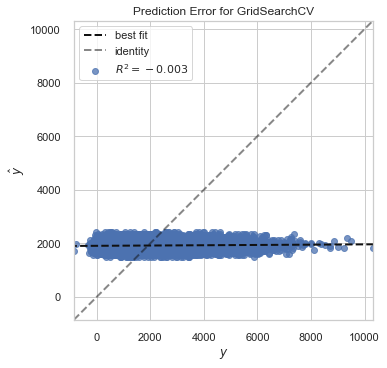

<AxesSubplot:title={'center':'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [56]:
# prediction error visualizer plots the actual targets from the dataset against the predicted values generated by our model
visualizer = PredictionError(cat_search)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

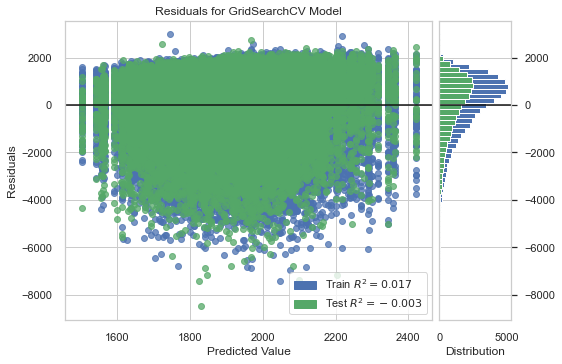

<AxesSubplot:title={'center':'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [57]:
# residual plot shows the residuals on the vertical axis and the independent variable on the horizontal axis.
visualizer = ResidualsPlot(cat_search)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

**Model Implementation**

Building model with pipe for transformation, performing feature selection using recursive feature elimination then passing through final estimator HistGradientboostingregressor for modelling.

In [58]:
# Pipeline of transforms with a final estimator.
pp = Pipeline([
    # Non-Negative Matrix Factorization
    # 'select', RFE(estimator=LassoCV(cv=4))
    # Apply a power transform featurewise to make data more Gaussian-like.
    ('tran', RFE(LassoCV(cv=3))),
    # Construct a gradient boosting model.
    ('lgb', LGBMRegressor(boosting_type='dart', learning_rate=0.1, max_depth=10))
])
# Fit the model
pp.fit(x_train, y_train)
# Construct a gradient boosting model.
#gb = LGBMRegressor(boosting_type='dart', learning_rate=0.5, max_depth=7, importance_type='gain', n_estimators=60)

Pipeline(steps=[('tran', RFE(estimator=LassoCV(cv=3))),
                ('lgb', LGBMRegressor(boosting_type='dart', max_depth=10))])

In [59]:
# Split dataset into k consecutive folds
kfd = KFold(n_splits=6, shuffle=True, random_state=12)

# specifying parameter
param = {
    'lgb__max_depth' : [10, 15]
}

# Exhaustive search over specified parameter values for an estimator.
lgb_search = GridSearchCV(estimator=pp, param_grid=param, cv=kfd, scoring='r2')
# Run fit with all sets of parameters.
lgb_search.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=12, shuffle=True),
             estimator=Pipeline(steps=[('tran', RFE(estimator=LassoCV(cv=3))),
                                       ('lgb',
                                        LGBMRegressor(boosting_type='dart',
                                                      max_depth=10))]),
             param_grid={'lgb__max_depth': [10, 15]}, scoring='r2')

In [60]:
# Call predict on the estimator with the best found parameters.
yhat = lgb_search.predict(x_test)

**Model Evaluation and Error Performances**

In [61]:
# R^2 (coefficient of determination) regression score function.
print("R2 Score: {:.3f}".format(r2_score(y_test, yhat)))
# Mean absolute error regression loss
print("Mean Absolute Error: {:.3f}".format(mean_absolute_error(y_test, yhat)))
# Mean squared error regression loss
print("Mean Square Error: {:.3f}".format(mean_squared_error(y_test, yhat)))
# Root Mean Squared Error
print("Root Mean Square Error: {:.3f}".format(math.sqrt(mean_squared_error(y_test, yhat))))

R2 Score: -0.017
Mean Absolute Error: 982.077
Mean Square Error: 1687948.263
Root Mean Square Error: 1299.211


**Model Interpretation and Analysis**

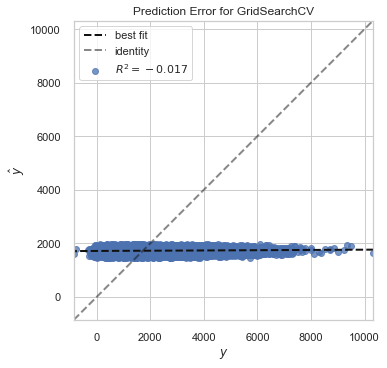

<AxesSubplot:title={'center':'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [62]:
# prediction error visualizer plots the actual targets from the dataset against the predicted values generated by our model
visualizer = PredictionError(lgb_search)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

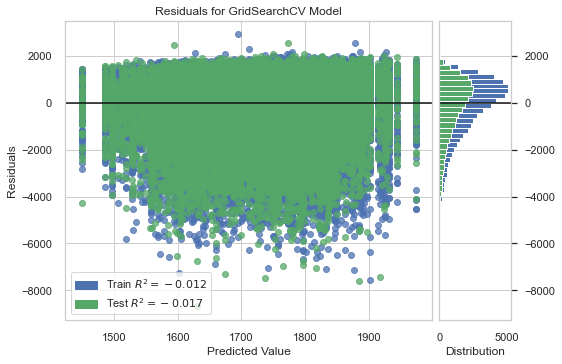

<AxesSubplot:title={'center':'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [63]:
# residual plot shows the residuals on the vertical axis and the independent variable on the horizontal axis.
visualizer = ResidualsPlot(lgb_search)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [64]:
xxx

NameError: name 'xxx' is not defined

**Saving Model**

In [ ]:
# saving file
filename = "DAC.pkl"

with open(filename, 'wb') as file:
    # Write a pickled representation of obj to the open file object file.
    pickle.dump(cat_search, file)

In [ ]:
# loading file

with open(filename, 'rb') as file:
    # Read and return an object from the pickle data stored in a file.
    load_mdl = pickle.load(file)

**Loading Unseen Datasets for Prediction**

In [ ]:
# loading unseen dataset
test = pd.read_csv('test.csv')

In [ ]:
# return the first 5 row
test.head()

In [ ]:
# Return a tuple representing the dimensionality of the DataFrame.
test.shape

In [ ]:
# returns the number of missing values present
test.isnull().sum()

In [ ]:
# dropping inrelevant cols
new_test = test.drop(['Item_ID','Outlet_ID', 'Outlet_Year'], axis=1)

In [ ]:
# return a subset of the DataFrame's columns based on the column dtypes.
test_cat_col = new_test.select_dtypes(include='object')
# return a subset of the DataFrame's columns based on the column dtypes.
test_num_col = new_test.select_dtypes(include=['float64', 'int64'])

In [ ]:
# Encode categorical features as an integer array.
encode_test = OrdinalEncoder().fit_transform(test_cat_col)

new_encode_test = pd.DataFrame(encode_test, columns=['Item_Type','Outlet_Size','Outlet_Location_Type'])
# Concatenate pandas objects
con = pd.concat([test_num_col, new_encode_test], axis=1)
con.head()

In [ ]:
# Transform features by scaling each feature to a given range.
scale = QuantileTransformer().fit_transform(con)

In [ ]:
# Predict using the base regressor, applying inverse.
pred = load_mdl.predict(scale)

In [ ]:
# creating a dataframe
submit = pd.DataFrame(pred, columns=['Sales'])
# return the first 5 rwo
submit.head()

In [ ]:
submit.to_csv('sub_file.csv', index=False)

In [ ]:
submit.shape